In [1]:
from glob import glob
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from src.util import (load_exp_data, pca, load_sim_data)

In [2]:
import numpy as np

voltage, temp, timestamp = load_exp_data("exp_data")
voltage_sim, _ , _ = load_sim_data("data13")


In [3]:
mean_voltage = np.mean(voltage, axis=0)     

voltage = (voltage - mean_voltage)

empty_tank = voltage[0]
voltage = voltage[1:] 

differenced_voltage = voltage - empty_tank  

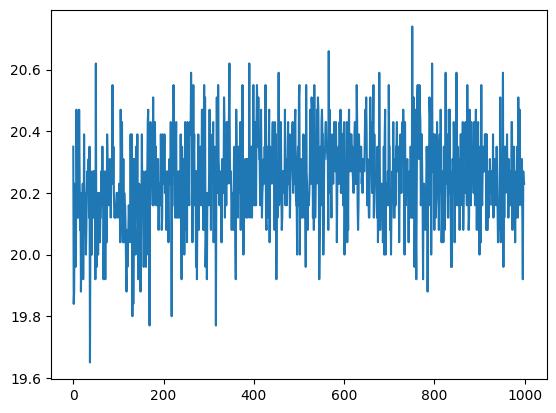

In [18]:
new_temp=temp[1:]
new_temp.shape

plt.plot(new_temp)

plt.show()


In [17]:
voltage_1st = voltage[:, 0, :, :]  # 1. Messung
voltage_2nd = voltage[:, 1, :, :]  # 2. Messung
voltage_3rd = voltage[:, 2, :, :]  # 3. Messung
voltage_4th = voltage[:, 3, :, :]  # 4. Messung
voltage_5th = voltage[:, 4, :, :]  # 5. Messung

mean_voltage = np.mean(voltage, axis=1) 
mean_diff_voltage = np.mean(differenced_voltage, axis=1)
abs_voltage = np.abs(mean_voltage)
abs_diff_voltage = np.abs(mean_diff_voltage)

print("Shape of abs_voltage:", abs_voltage.shape)
#print("Shape of voltage_sim:", voltage_sim.shape)

abs_voltage_1st = np.abs(voltage_1st)
abs_voltage_2nd = np.abs(voltage_2nd)
abs_voltage_3rd = np.abs(voltage_3rd)
abs_voltage_4th = np.abs(voltage_4th)
abs_voltage_5th = np.abs(voltage_5th)

mean_voltage.shape

Shape of abs_voltage: (1000, 32, 32)


(1000, 32, 32)

In [5]:
v = abs_voltage.reshape(1000, -1)  
v1 = abs_voltage_1st.reshape(1000, -1)
v2 = abs_voltage_2nd.reshape(1000,-1)
v3 = abs_voltage_3rd.reshape(1000,-1)
v4 = abs_voltage_4th.reshape(1000,-1)
v5 = abs_voltage_5th.reshape(1000,-1)
dv = abs_diff_voltage = abs_diff_voltage.reshape(1000,-1)
dv.shape, v5.shape

((1000, 1024), (1000, 1024))

In [6]:
angle = np.linspace(0,2*np.pi, 1000)
angle = np.degrees(angle)

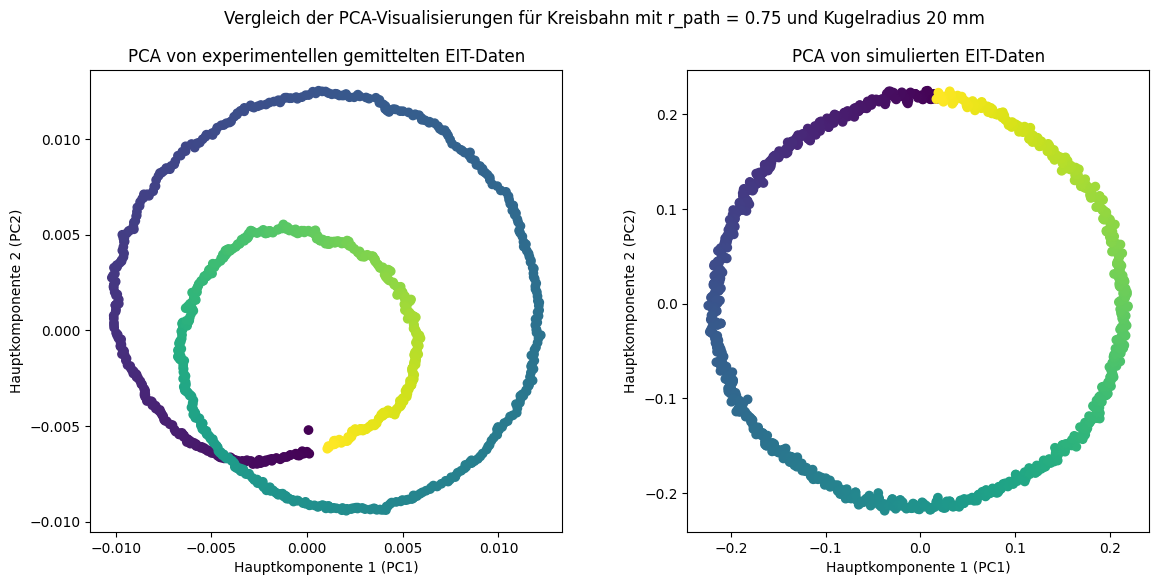

In [7]:
def pca(V, angle, ax, title):
    pca = PCA(n_components=2)
    V_pca = pca.fit_transform(V)

    scatter = ax.scatter(V_pca[:, 0], V_pca[:, 1], c=angle, cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel('Hauptkomponente 1 (PC1)')
    ax.set_ylabel('Hauptkomponente 2 (PC2)')
    ax.set_aspect('equal')  # Gleiche Skalierung der Achsen

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Vergleich der PCA-Visualisierungen für Kreisbahn mit r_path = 0.75 und Kugelradius 20 mm')

pca(v, angle, axs[0], 'PCA von experimentellen gemittelten EIT-Daten')
pca(voltage_sim, angle, axs[1], 'PCA von simulierten EIT-Daten')

#plt.savefig('PCA_Analyse1.pdf', format='pdf')


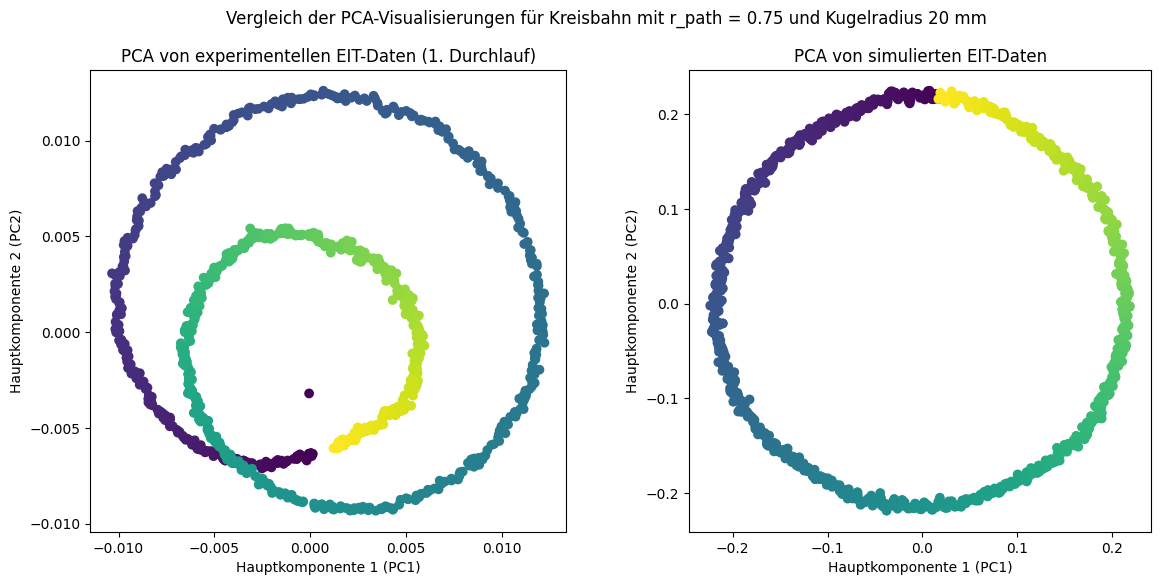

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Vergleich der PCA-Visualisierungen für Kreisbahn mit r_path = 0.75 und Kugelradius 20 mm')

pca(v1, angle, axs[0], 'PCA von experimentellen EIT-Daten (1. Durchlauf)')
pca(voltage_sim, angle, axs[1], 'PCA von simulierten EIT-Daten')

#plt.savefig('PCA_Analyse2.pdf', format='pdf')

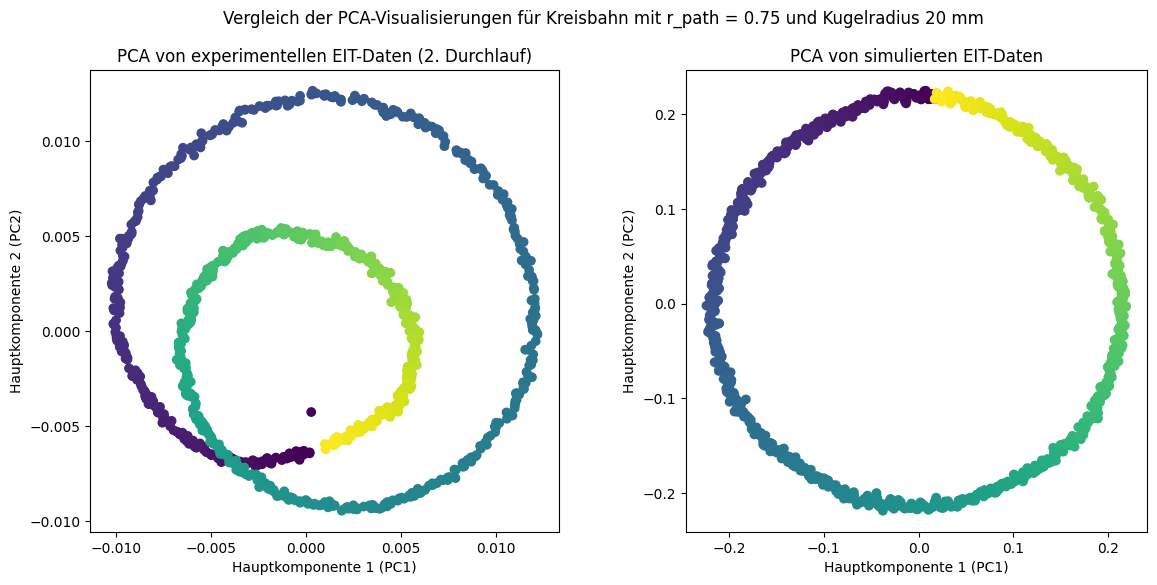

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Vergleich der PCA-Visualisierungen für Kreisbahn mit r_path = 0.75 und Kugelradius 20 mm')

pca(v2, angle, axs[0], 'PCA von experimentellen EIT-Daten (2. Durchlauf)')
pca(voltage_sim, angle, axs[1], 'PCA von simulierten EIT-Daten')

#plt.savefig('PCA_Analyse3.pdf', format='pdf')

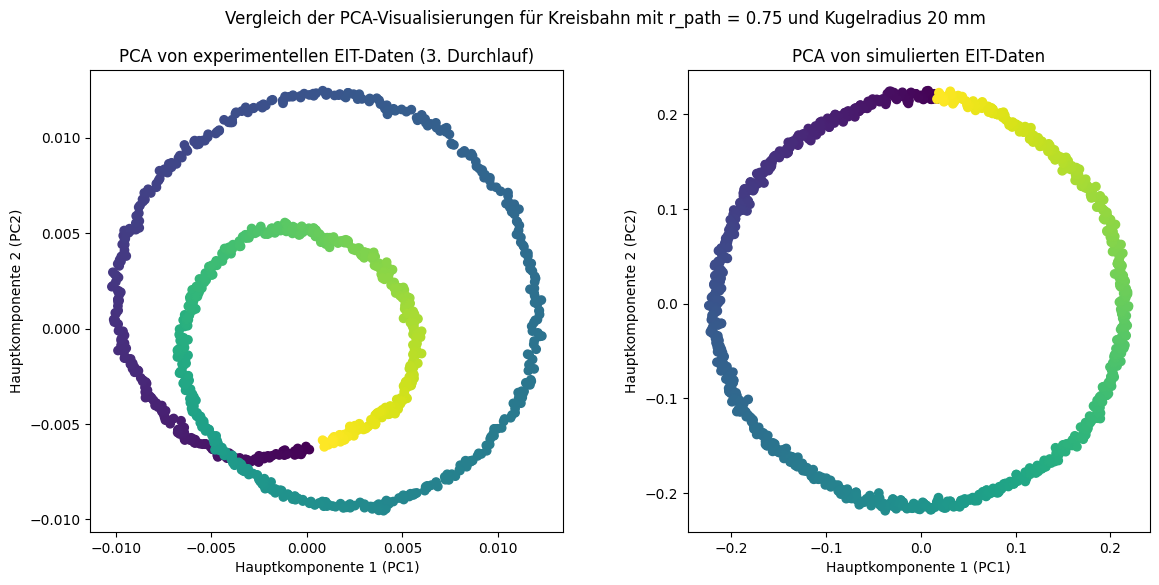

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Vergleich der PCA-Visualisierungen für Kreisbahn mit r_path = 0.75 und Kugelradius 20 mm')

pca(v3, angle, axs[0], 'PCA von experimentellen EIT-Daten (3. Durchlauf)')
pca(voltage_sim, angle, axs[1], 'PCA von simulierten EIT-Daten')

#plt.savefig('PCA_Analyse4.pdf', format='pdf')

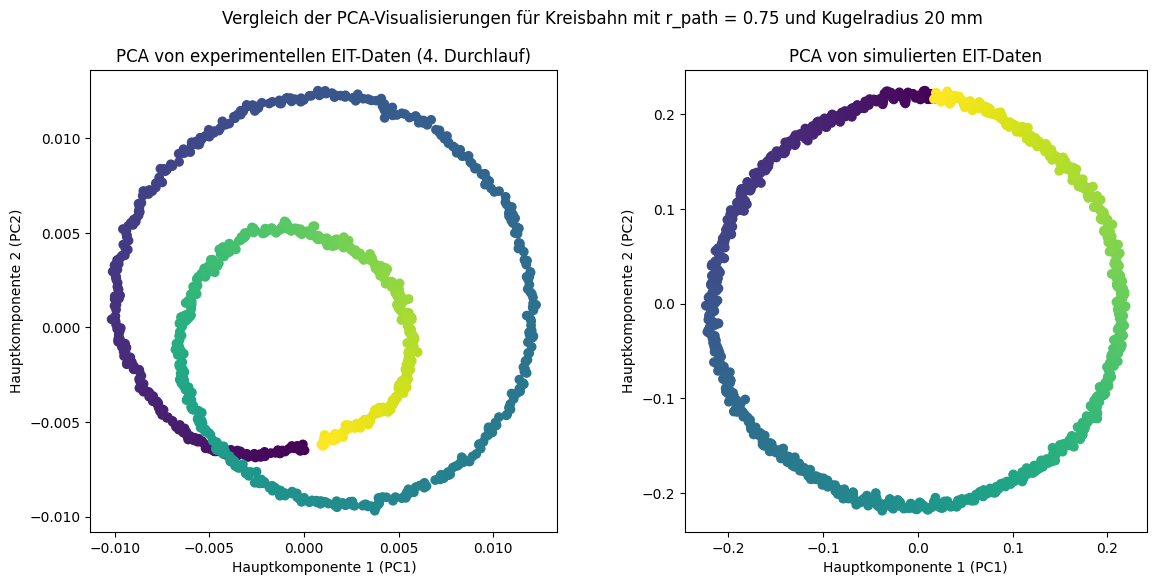

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Vergleich der PCA-Visualisierungen für Kreisbahn mit r_path = 0.75 und Kugelradius 20 mm')

pca(v4, angle, axs[0], 'PCA von experimentellen EIT-Daten (4. Durchlauf)')
pca(voltage_sim, angle, axs[1], 'PCA von simulierten EIT-Daten')

#plt.savefig('PCA_Analyse5.pdf', format='pdf')

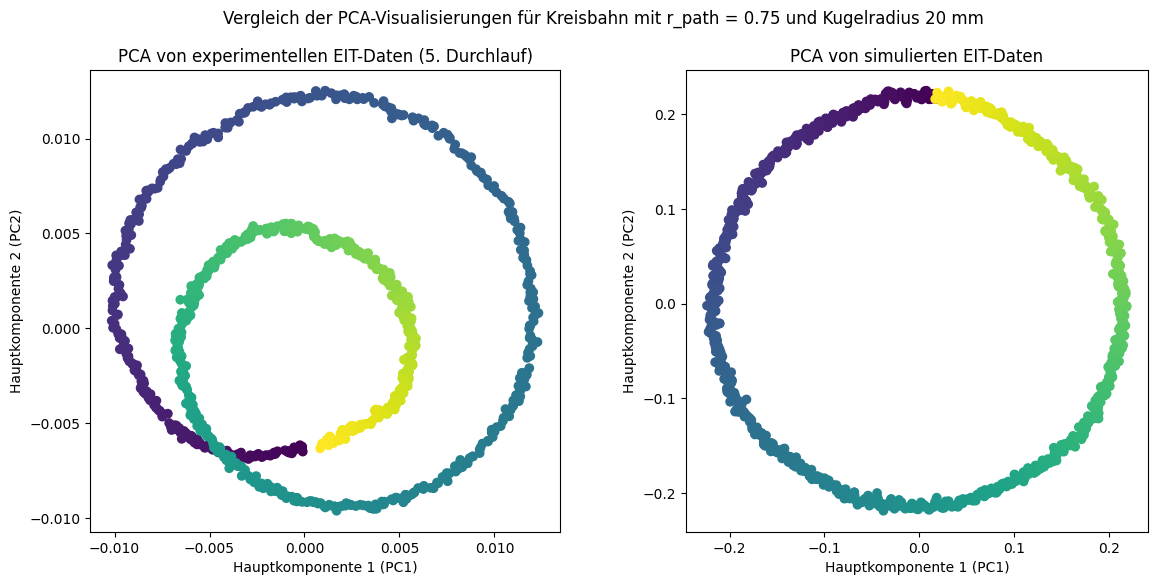

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Vergleich der PCA-Visualisierungen für Kreisbahn mit r_path = 0.75 und Kugelradius 20 mm')

pca(v5, angle, axs[0], 'PCA von experimentellen EIT-Daten (5. Durchlauf)')
pca(voltage_sim, angle, axs[1], 'PCA von simulierten EIT-Daten')

#plt.savefig('PCA_Analyse6.pdf', format='pdf')

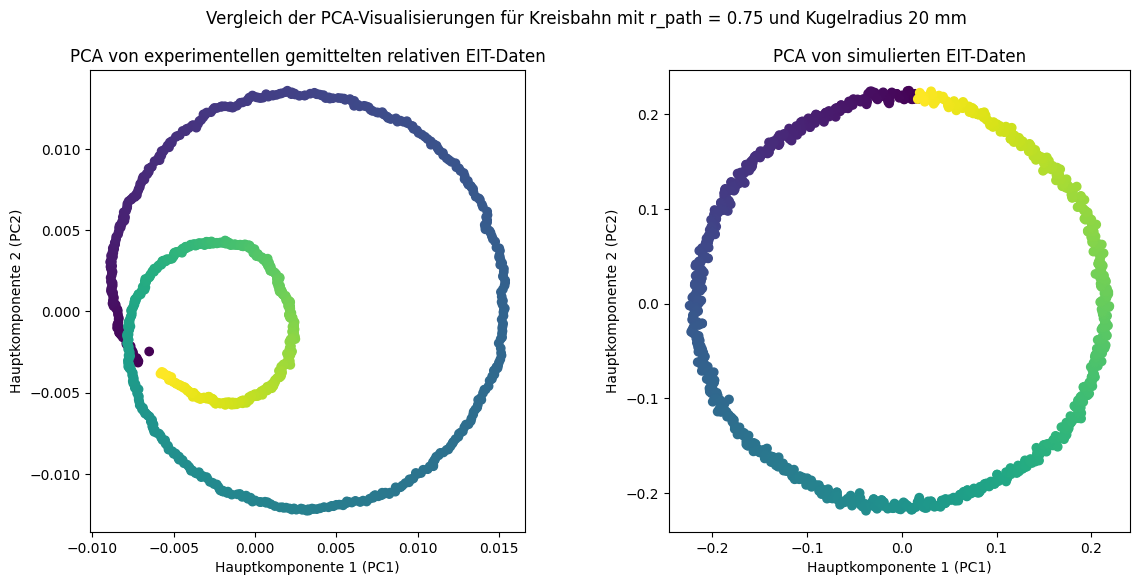

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Vergleich der PCA-Visualisierungen für Kreisbahn mit r_path = 0.75 und Kugelradius 20 mm')

pca(dv, angle, axs[0], 'PCA von experimentellen gemittelten relativen EIT-Daten')
pca(voltage_sim, angle, axs[1], 'PCA von simulierten EIT-Daten')

#plt.savefig('PCA_Analyse7.pdf', format='pdf')